In [1]:
import numpy as np

import matplotlib.pyplot as plt
import cartopy.crs as crs
import cartopy.feature as cfeature

from tqdm import tqdm


In [2]:
Pressure = [100.0,90.0,80.0,70.0,50.0,40.0,30.0,20.0,15.0,10.0]

# EOF

In [3]:
File1 = open('/n/home12/hongwei/Paper_3_QBO/QBO_EOF/QBO_EOF_read.txt', 'r')
        
Lines1 = File1.readlines()

Nz = 10
N_EOF = 10
QBO_EOFs = np.zeros((N_EOF, Nz))

# Strips the newline character
i = 1
for line1 in Lines1:
    if i>=11:
        iEOF = i-11
        a1 = line1.split(',')
        for iz in range(1,len(a1)-1):
            QBO_EOFs[iEOF,iz] = float(a1[iz])
    
    i = i+1

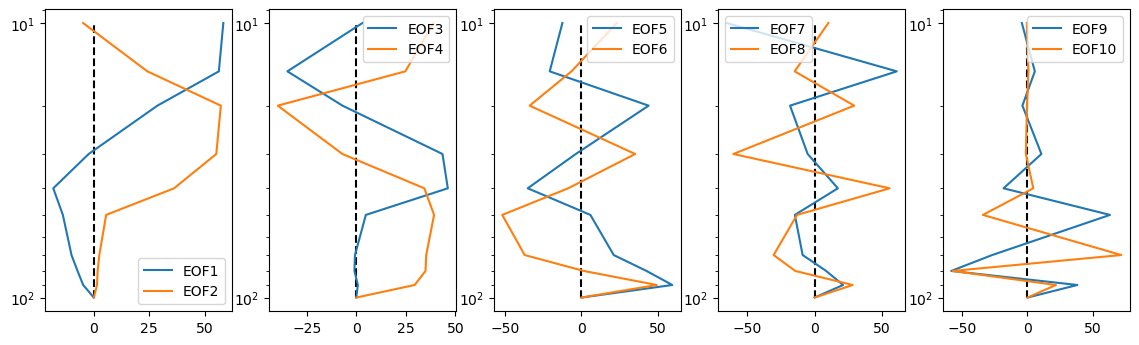

In [4]:
fig = plt.figure(figsize=(14,4), dpi=100)

###
ax1 = fig.add_subplot(1,5,1)
ax1.plot(QBO_EOFs[0,:]*0, Pressure, 'k--')
ax1.plot(QBO_EOFs[0,:], Pressure, label='EOF1')
ax1.plot(QBO_EOFs[1,:], Pressure, label='EOF2')

ax1.invert_yaxis()
ax1.set_yscale("log")

ax1.legend();

###
ax1 = fig.add_subplot(1,5,2)
ax1.plot(QBO_EOFs[0,:]*0, Pressure, 'k--')
ax1.plot(QBO_EOFs[2,:], Pressure, label='EOF3')
ax1.plot(QBO_EOFs[3,:], Pressure, label='EOF4')

ax1.invert_yaxis()
ax1.set_yscale("log")

ax1.legend();

###
ax1 = fig.add_subplot(1,5,3)
ax1.plot(QBO_EOFs[0,:]*0, Pressure, 'k--')
ax1.plot(QBO_EOFs[4,:], Pressure, label='EOF5')
ax1.plot(QBO_EOFs[5,:], Pressure, label='EOF6')

ax1.invert_yaxis()
ax1.set_yscale("log")

ax1.legend();

###
ax1 = fig.add_subplot(1,5,4)
ax1.plot(QBO_EOFs[0,:]*0, Pressure, 'k--')
ax1.plot(QBO_EOFs[6,:], Pressure, label='EOF7')
ax1.plot(QBO_EOFs[7,:], Pressure, label='EOF8')

ax1.invert_yaxis()
ax1.set_yscale("log")

ax1.legend();

###
ax1 = fig.add_subplot(1,5,5)
ax1.plot(QBO_EOFs[0,:]*0, Pressure, 'k--')
ax1.plot(QBO_EOFs[8,:], Pressure, label='EOF9')
ax1.plot(QBO_EOFs[9,:], Pressure, label='EOF10')

ax1.invert_yaxis()
ax1.set_yscale("log")

ax1.legend();

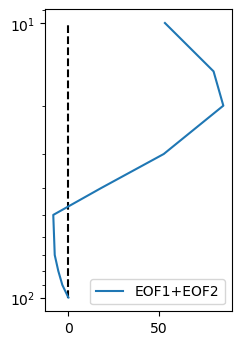

In [5]:
fig = plt.figure(figsize=(14,4), dpi=100)

###
ax1 = fig.add_subplot(1,5,1)
ax1.plot(QBO_EOFs[0,:]*0, Pressure, 'k--')
ax1.plot(QBO_EOFs[0,:]+QBO_EOFs[1,:], Pressure, label='EOF1+EOF2')

ax1.invert_yaxis()
ax1.set_yscale("log")

ax1.legend();

# PC

In [6]:
File2 = open('/n/home12/hongwei/Paper_3_QBO/QBO_EOF/QBO_PC_read.txt', 'r')
        
Lines2 = File2.readlines()

# 1979.1-2022.10
N_year = 2022-1979+1 
N_mon = 12
Nt = 12*(2021-1979+1)+10

N_EOF = 10

QBO_PCs = np.zeros((N_EOF, Nt))

# Strips the newline character
i = 1
for line2 in Lines2:
    if i>=9:
        a2 = line2.split(',')
        for iEOF in range(N_EOF):
#             print(iEOF, i)
            QBO_PCs[iEOF,i-9] = float(a2[iEOF+2])
    
    i = i+1

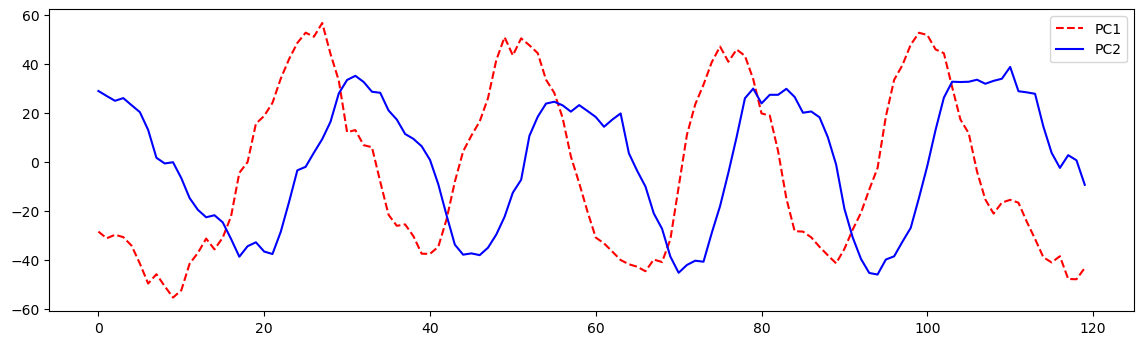

In [7]:
fig = plt.figure(figsize=(14,4), dpi=100)

i_2000 = 12*(2000-1979)-1
i_2010 = 12*(2010-1979)-1

###
ax1 = fig.add_subplot(1,1,1)
ax1.plot(QBO_PCs[0,i_2000:i_2010], 'r--', label='PC1')
ax1.plot(QBO_PCs[1,i_2000:i_2010], 'b-', label='PC2')

# ax1.plot(QBO_PCs[1,:]+QBO_PCs[0,:], 'k-', label='EOF2')

# ax1.invert_yaxis()
# ax1.set_yscale("log")

ax1.legend();

# monthly mean particle lifetime

In [8]:
Years = ["2000","2001","2002","2003","2004","2005","2006","2007","2008","2009"]

Months = []
for imon in range(1,13): ### shw
    Months.append(str(imon).zfill(2))
    
Days = []
for iday in range(1,30,3):
    Days.append(str(iday).zfill(2))
    
print(Years)
print(Months)
print(Days)

['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009']
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
['01', '04', '07', '10', '13', '16', '19', '22', '25', '28']


In [9]:
Nx = 24
Ny = 21
Nz = 6+1
N_parcel = Nx*Ny*Nz
# if Nx*Ny*Nz!=N_parcel: print('ERROR: parcel number is wrong!')
    
N_year  = len(Years)
N_month = len(Months)
N_day   = len(Days)

lifetime   = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_N = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
lifetime_S = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LON = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LAT = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

print(lifetime.shape)


Nz1 = 6
lifetime1   = np.zeros((Nz1, Ny, Nx, N_day, N_month, N_year))
lifetime1_N = np.zeros((Nz1, Ny, Nx, N_day, N_month, N_year))
lifetime1_S = np.zeros((Nz1, Ny, Nx, N_day, N_month, N_year))
LON1 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LAT1 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))


Nz2 = 1
lifetime2   = np.zeros((Nz2, Ny, Nx, N_day, N_month, N_year))
lifetime2_N = np.zeros((Nz2, Ny, Nx, N_day, N_month, N_year))
lifetime2_S = np.zeros((Nz2, Ny, Nx, N_day, N_month, N_year))
LON2 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))
LAT2 = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

if Nz!=(Nz1+Nz2): print("Error: Nz=Nz1+Nz2!!!")    


(7, 21, 24, 10, 12, 10)


In [10]:
#  for first 6 altitude injections

directory1 = '/n/home12/hongwei/Paper_2/Plot_python/Lifetime/'
filename1 = "Lifetime_"+Years[0]+Months[0]+Days[0]+".txt"
print(directory1+filename1)

for i_year in range(N_year):
    for i_month in tqdm(range(N_month)):
        for i_day in range(N_day):
            filename1 = "Lifetime_"+Years[i_year]+Months[i_month]+Days[i_day]+".txt"
            File1 = open(directory1+filename1, 'r')
        
            Lines1 = File1.readlines()

            # Strips the newline character
            data = []
            data_N = []
            data_S = []
            Longitude = []
            Latitude = []
            for line1 in Lines1:
                a1 = line1.split(',')
                data.append(float(a1[0]))
                data_N.append(float(a1[1]))
                data_S.append(float(a1[2]))
                Longitude.append(float(a1[3]))
                Latitude.append(float(a1[4]))
    
    
            i = 0
            for ix in range(Nx):
                for iy in range(Ny):
                    for iz in range(Nz1):
                        lifetime1[iz,iy,ix,i_day,i_month,i_year] = data[i]
                        lifetime1_N[iz,iy,ix,i_day,i_month,i_year] = data_N[i]
                        lifetime1_S[iz,iy,ix,i_day,i_month,i_year] = data_S[i]
                        
                        LON1[iz,iy,ix,i_day,i_month,i_year] = Longitude[i]
                        LAT1[iz,iy,ix,i_day,i_month,i_year] = Latitude[i]
                        
                        i = i+1

/n/home12/hongwei/Paper_2/Plot_python/Lifetime/Lifetime_20000101.txt


100%|██████████| 12/12 [00:02<00:00,  5.33it/s]


In [11]:
# for 21-km injection

directory2 = '/n/home12/hongwei/Paper_2/Plot_python/21km_post_process/Lifetime_21km/'
filename2 = "Lifetime_"+Years[0]+Months[0]+Days[0]+"_21km.txt"
print(directory2+filename2)

for i_year in range(N_year):
    for i_month in tqdm(range(N_month)):
        for i_day in range(N_day):
            filename2 = "Lifetime_"+Years[i_year]+Months[i_month]+Days[i_day]+"_21km.txt"
            File2 = open(directory2+filename2, 'r')
        
            Lines2 = File2.readlines()

            # Strips the newline character
            data = []
            data_N = []
            data_S = []
            Longitude = []
            Latitude = []
            for line2 in Lines2:
                a2 = line2.split(',')
                data.append(     float(a2[0]))
                data_N.append(   float(a2[1]))
                data_S.append(   float(a2[2]))
                Longitude.append(float(a2[3]))
                Latitude.append( float(a2[4]))
    
    
            i = 0
            for ix in range(Nx):
                for iy in range(Ny):
                    for iz in range(Nz2):
                        lifetime2[iz,iy,ix,i_day,i_month,i_year] = data[i]
                        lifetime2_N[iz,iy,ix,i_day,i_month,i_year] = data_N[i]
                        lifetime2_S[iz,iy,ix,i_day,i_month,i_year] = data_S[i]
                        
                        LON2[iz,iy,ix,i_day,i_month,i_year] = Longitude[i]
                        LAT2[iz,iy,ix,i_day,i_month,i_year] = Latitude[i]
                        
                        i = i+1

  8%|▊         | 1/12 [00:00<00:01,  9.50it/s]

/n/home12/hongwei/Paper_2/Plot_python/21km_post_process/Lifetime_21km/Lifetime_20000101_21km.txt


100%|██████████| 12/12 [00:01<00:00, 10.41it/s]


In [12]:
# Combine (1) 6 altitude injections and (2) 21-km injection

# Pressure = [100, 75, 65, 55, 47, 40, 30] # hPa
# Height   = [16,  18, 19, 20, 21, 22, 24] # km

# lifetime   = np.zeros((Nz, Ny, Nx, N_day, N_month, N_year))

lifetime[0:4,:,:,:,:,:]   = lifetime1[0:4,:,:,:,:,:]
lifetime_N[0:4,:,:,:,:,:] = lifetime1_N[0:4,:,:,:,:,:]
lifetime_S[0:4,:,:,:,:,:] = lifetime1_S[0:4,:,:,:,:,:]
LON[0:4,:,:,:,:,:] = LON1[0:4,:,:,:,:,:]
LAT[0:4,:,:,:,:,:] = LAT1[0:4,:,:,:,:,:]

# 21-km
lifetime[4,:,:,:,:,:]   = lifetime2[0,:,:,:,:,:]
lifetime_N[4,:,:,:,:,:] = lifetime2_N[0,:,:,:,:,:]
lifetime_S[4,:,:,:,:,:] = lifetime2_S[0,:,:,:,:,:]
LON[4,:,:,:,:,:] = LON2[0,:,:,:,:,:]
LAT[4,:,:,:,:,:] = LAT2[0,:,:,:,:,:]


lifetime[5:7,:,:,:,:,:]   = lifetime1[4:6,:,:,:,:,:]
lifetime_N[5:7,:,:,:,:,:] = lifetime1_N[4:6,:,:,:,:,:]
lifetime_S[5:7,:,:,:,:,:] = lifetime1_S[4:6,:,:,:,:,:]
LON[5:7,:,:,:,:,:] = LON1[4:6,:,:,:,:,:]
LAT[5:7,:,:,:,:,:] = LAT1[4:6,:,:,:,:,:]


In [13]:
lifetime_monthly = np.mean(lifetime[:,:,:,:,:,:], axis=3)
lifetime_AreaMean_monthly = np.mean(lifetime[:,:,:,:,:,:], axis=(1,2,3))

lifetime_monthly.shape, lifetime_AreaMean_monthly.shape


((7, 21, 24, 12, 10), (7, 12, 10))

In [14]:
N_month, N_year

(12, 10)

In [15]:
R1 = []

for iz in range(Nz):
    var1 = []
    for iyr in range(N_year):
        for imon in range(N_month):
            var1.append( lifetime_AreaMean_monthly[iz,imon,iyr] )
    var2 = QBO_PCs[0,i_2000:i_2010]
    corr = np.corrcoef(var1, var2)
    R1.append( corr[0,1] )
    
print(R1)
print('')

R2 = []

for iz in range(Nz):
    var1 = []
    for iyr in range(N_year):
        for imon in range(N_month):
            var1.append( lifetime_AreaMean_monthly[iz,imon,iyr] )
    var2 = QBO_PCs[1,i_2000:i_2010]
    corr = np.corrcoef(var1, var2)
    R2.append( corr[0,1] )
    
print(R2)
print('')

R3 = []

for iz in range(Nz):
    var1 = []
    for iyr in range(N_year):
        for imon in range(N_month):
            var1.append( lifetime_AreaMean_monthly[iz,imon,iyr] )
    var2 = QBO_PCs[0,i_2000:i_2010]+QBO_PCs[1,i_2000:i_2010]
    corr = np.corrcoef(var1, var2)
    R3.append( corr[0,1] )
    
print(R3)

[-0.21716896499291444, -0.2706600869614737, -0.24394129575160226, -0.12553952515706773, 0.05950598987423852, 0.24566154266366733, 0.40134641591511777]

[0.09095176314816866, -0.006941389219978121, -0.09216645839290441, 0.17757392037341563, 0.3297056466367542, 0.17751547684572994, -0.10781585227343714]

[-0.12480513798500986, -0.23236061106276665, -0.2642805467189667, 0.007670285349323692, 0.26064427728062844, 0.32022870478301046, 0.2691360588995116]


In [16]:
Correlation1 = np.zeros((Nz, Ny, Nx))
Correlation2 = np.zeros((Nz, Ny, Nx))
Correlation12 = np.zeros((Nz, Ny, Nx))

for ix in range(Nx):
    for iy in range(Ny):
        for iz in range(Nz):
            
            ###
            var1 = []
            for iyr in range(N_year):
                for imon in range(N_month):
                    var1.append( lifetime_monthly[iz,iy,ix,imon,iyr] )
            var2 = QBO_PCs[0,i_2000:i_2010]
            corr = np.corrcoef(var1, var2)
            Correlation1[iz,iy,ix] = corr[0,1]
            
            ###
            var2 = []
            for iyr in range(N_year):
                for imon in range(N_month):
                    var2.append( lifetime_monthly[iz,iy,ix,imon,iyr] )
            var2 = QBO_PCs[1,i_2000:i_2010]
            corr = np.corrcoef(var1, var2)
            Correlation2[iz,iy,ix] = corr[0,1]
            
            ###
            var1 = []
            for iyr in range(N_year):
                for imon in range(N_month):
                    var1.append( lifetime_monthly[iz,iy,ix,imon,iyr] )
            var2 = QBO_PCs[0,i_2000:i_2010]+QBO_PCs[1,i_2000:i_2010]
            corr = np.corrcoef(var1, var2)
            Correlation12[iz,iy,ix] = corr[0,1]

In [17]:
print(np.mean(Correlation1, axis=(1,2)))
print(np.mean(Correlation2, axis=(1,2)))
print(np.mean(Correlation12, axis=(1,2)))

[-0.05774607 -0.04347634 -0.0387871  -0.01702355  0.01080695  0.04943393
  0.09554077]
[ 0.02569191  0.00014076 -0.01217257  0.02945675  0.05561008  0.03552293
 -0.02452933]
[-0.03222357 -0.0365224  -0.04043616  0.00447371  0.04461049  0.06431241
  0.06479359]


In [18]:
Pressure = [100, 75, 65, 55, 47, 40, 30] # hPa
Height   = [16,  17.92, 18.87, 20, 21.05, 22.1, 24] # km

17.92


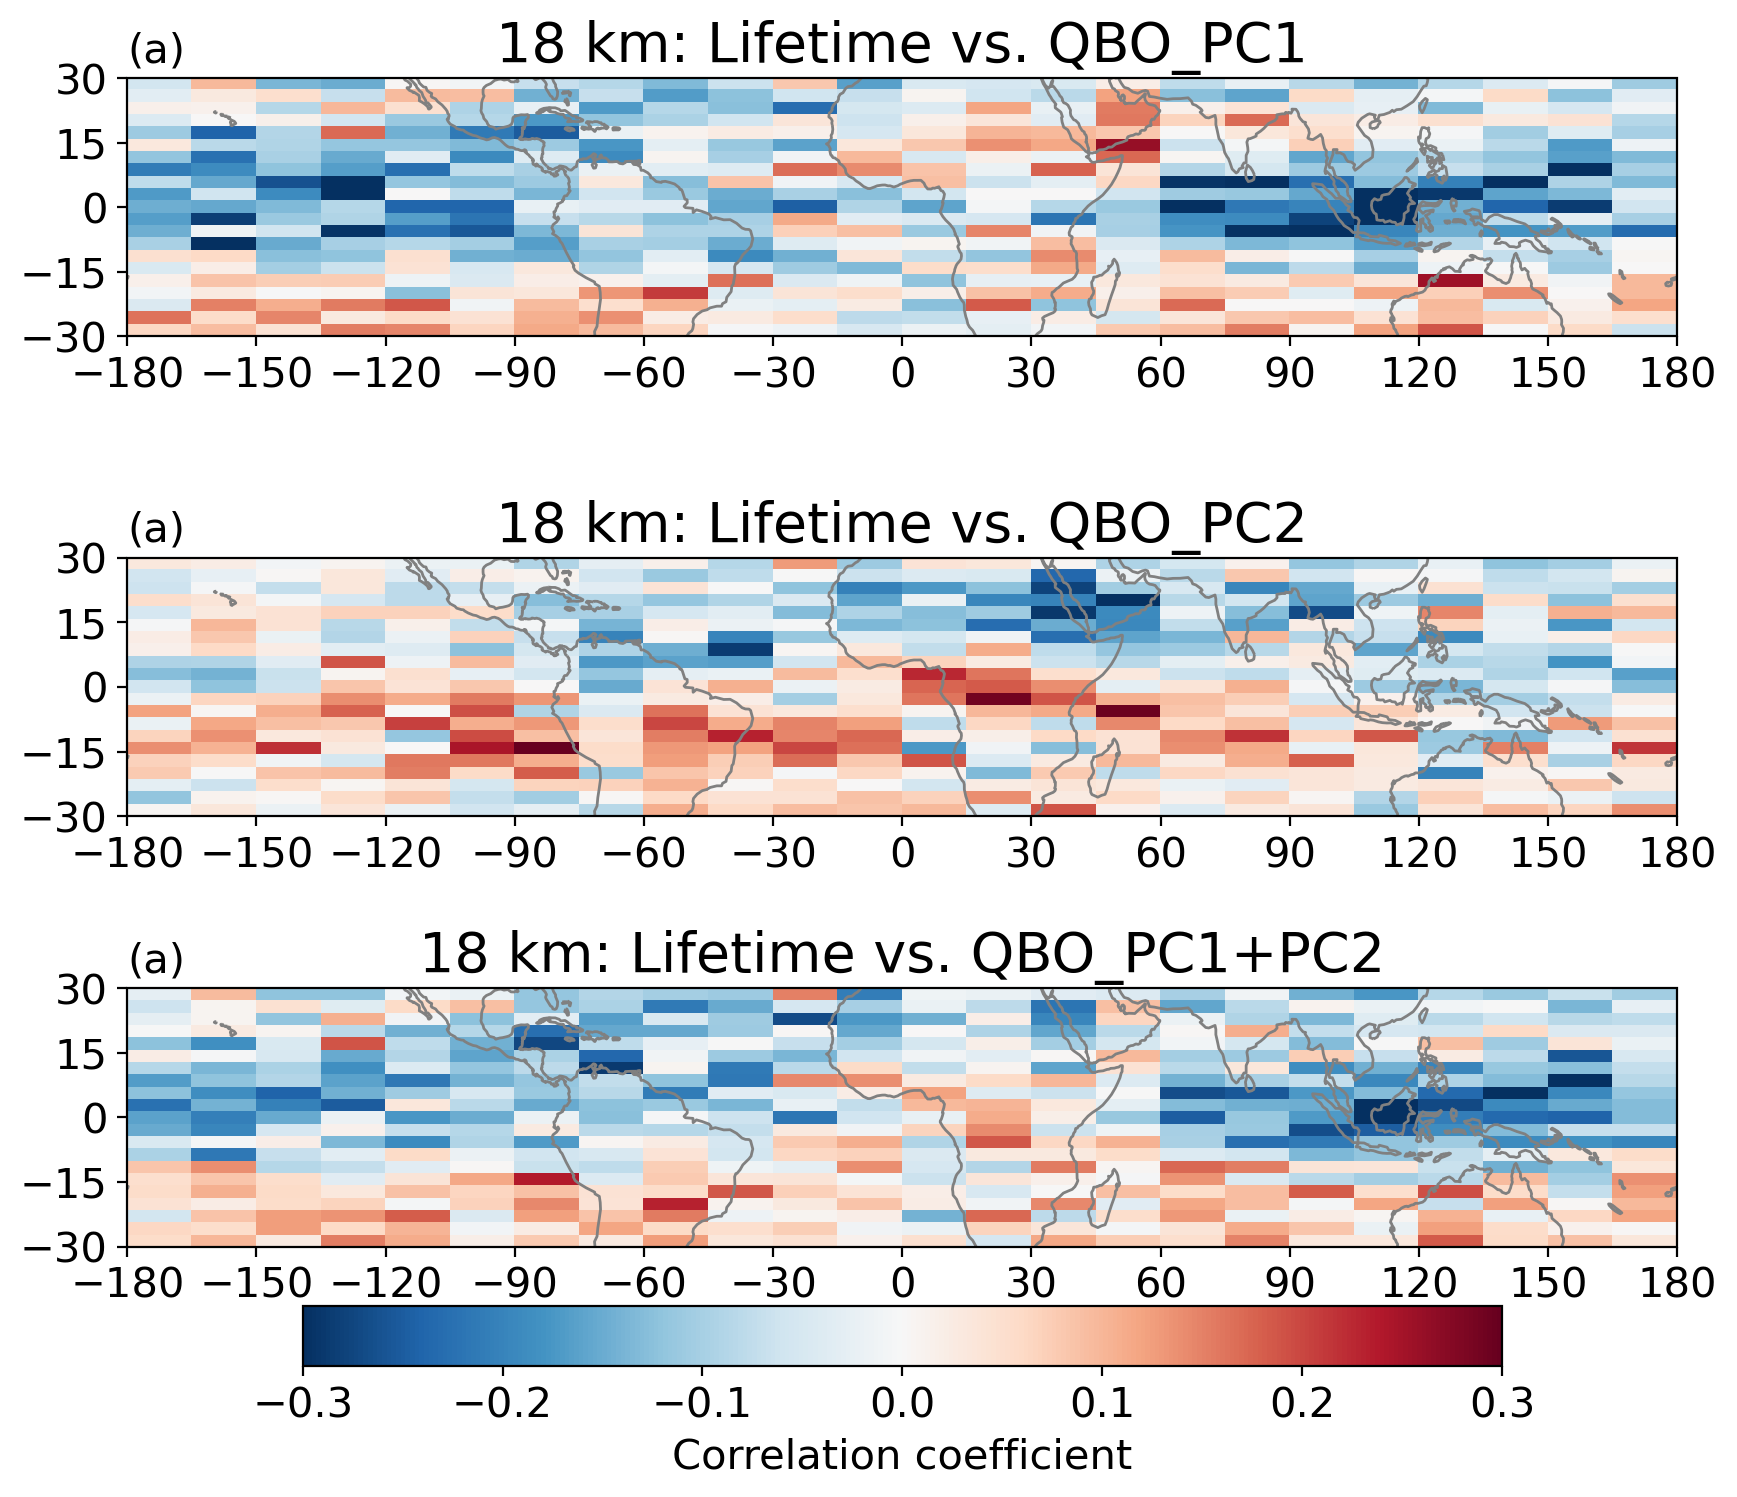

In [21]:
iz=1
print(Height[iz])

fig = plt.figure(figsize=(10,9), dpi=200)
projection = crs.PlateCarree()

Rmin = -0.3
Rmax = 0.3
    
extent = [-180 , 180 , -30 , 30]

###
ax1 = fig.add_subplot(3,1,1, projection=projection)

ax1.set_global()
ax1.set_extent(extent, crs=projection) ## Important
ax1.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax1_pixel = plt.imshow(Correlation1[iz,:,:], vmin=Rmin, vmax=Rmax,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')


ax1.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax1.set_yticks(np.linspace(-30, 30, 5), crs=projection)
# ax1.set_xticklabels([])
ax1.tick_params(axis='y', labelsize=15 )
ax1.tick_params(axis='x', labelsize=15 )

ax1.set_title(f"{Height[iz]:.0f} km: Lifetime vs. QBO_PC1", fontsize=20)
# ax1.set_ylabel("DJF", fontsize=15)
ax1.set_title("(a)", loc='left', fontsize=15)


###
ax2 = fig.add_subplot(3,1,2, projection=projection)

ax2.set_global()
ax2.set_extent(extent, crs=projection) ## Important
ax2.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax2_pixel = plt.imshow(Correlation2[iz,:,:], vmin=Rmin, vmax=Rmax,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

ax2.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax2.set_yticks(np.linspace(-30, 30, 5), crs=projection)
# ax1.set_xticklabels([])
ax2.tick_params(axis='y', labelsize=15 )
ax2.tick_params(axis='x', labelsize=15 )

ax2.set_title(f"{Height[iz]:.0f} km: Lifetime vs. QBO_PC2", fontsize=20)
# ax1.set_ylabel("DJF", fontsize=15)
ax2.set_title("(a)", loc='left', fontsize=15)



###
ax3 = fig.add_subplot(3,1,3, projection=projection)

ax3.set_global()
ax3.set_extent(extent, crs=projection) ## Important
ax3.add_feature(cfeature.COASTLINE, edgecolor="gray")

ax3_pixel = plt.imshow(Correlation12[iz,:,:], vmin=Rmin, vmax=Rmax,\
           extent = extent, cmap='RdBu_r', interpolation='nearest')

ax3.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax3.set_yticks(np.linspace(-30, 30, 5), crs=projection)
# ax1.set_xticklabels([])
ax3.tick_params(axis='y', labelsize=15 )
ax3.tick_params(axis='x', labelsize=15 )

ax3.set_title(f"{Height[iz]:.0f} km: Lifetime vs. QBO_PC1+PC2", fontsize=20)
# ax1.set_ylabel("DJF", fontsize=15)
ax3.set_title("(a)", loc='left', fontsize=15)


cb3 = plt.colorbar(ax3_pixel, ax=ax3, orientation="horizontal")
cb3.set_label('Correlation coefficient', fontsize=15);
cb3.ax.tick_params(labelsize=15)

In [20]:
# Correlation[iz,:,:]